In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as svm
df = pd.read_csv("/content/Copy of loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [211]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [212]:
df['loanamount_log'] = np.log(df['LoanAmount'])

In [213]:
# total income, these colums will help us train the model better
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome']

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: TotalIncome, Length: 614, dtype: float64

<ipython-input-214-e80bf4879ab6>:32: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=axes[1, 1])


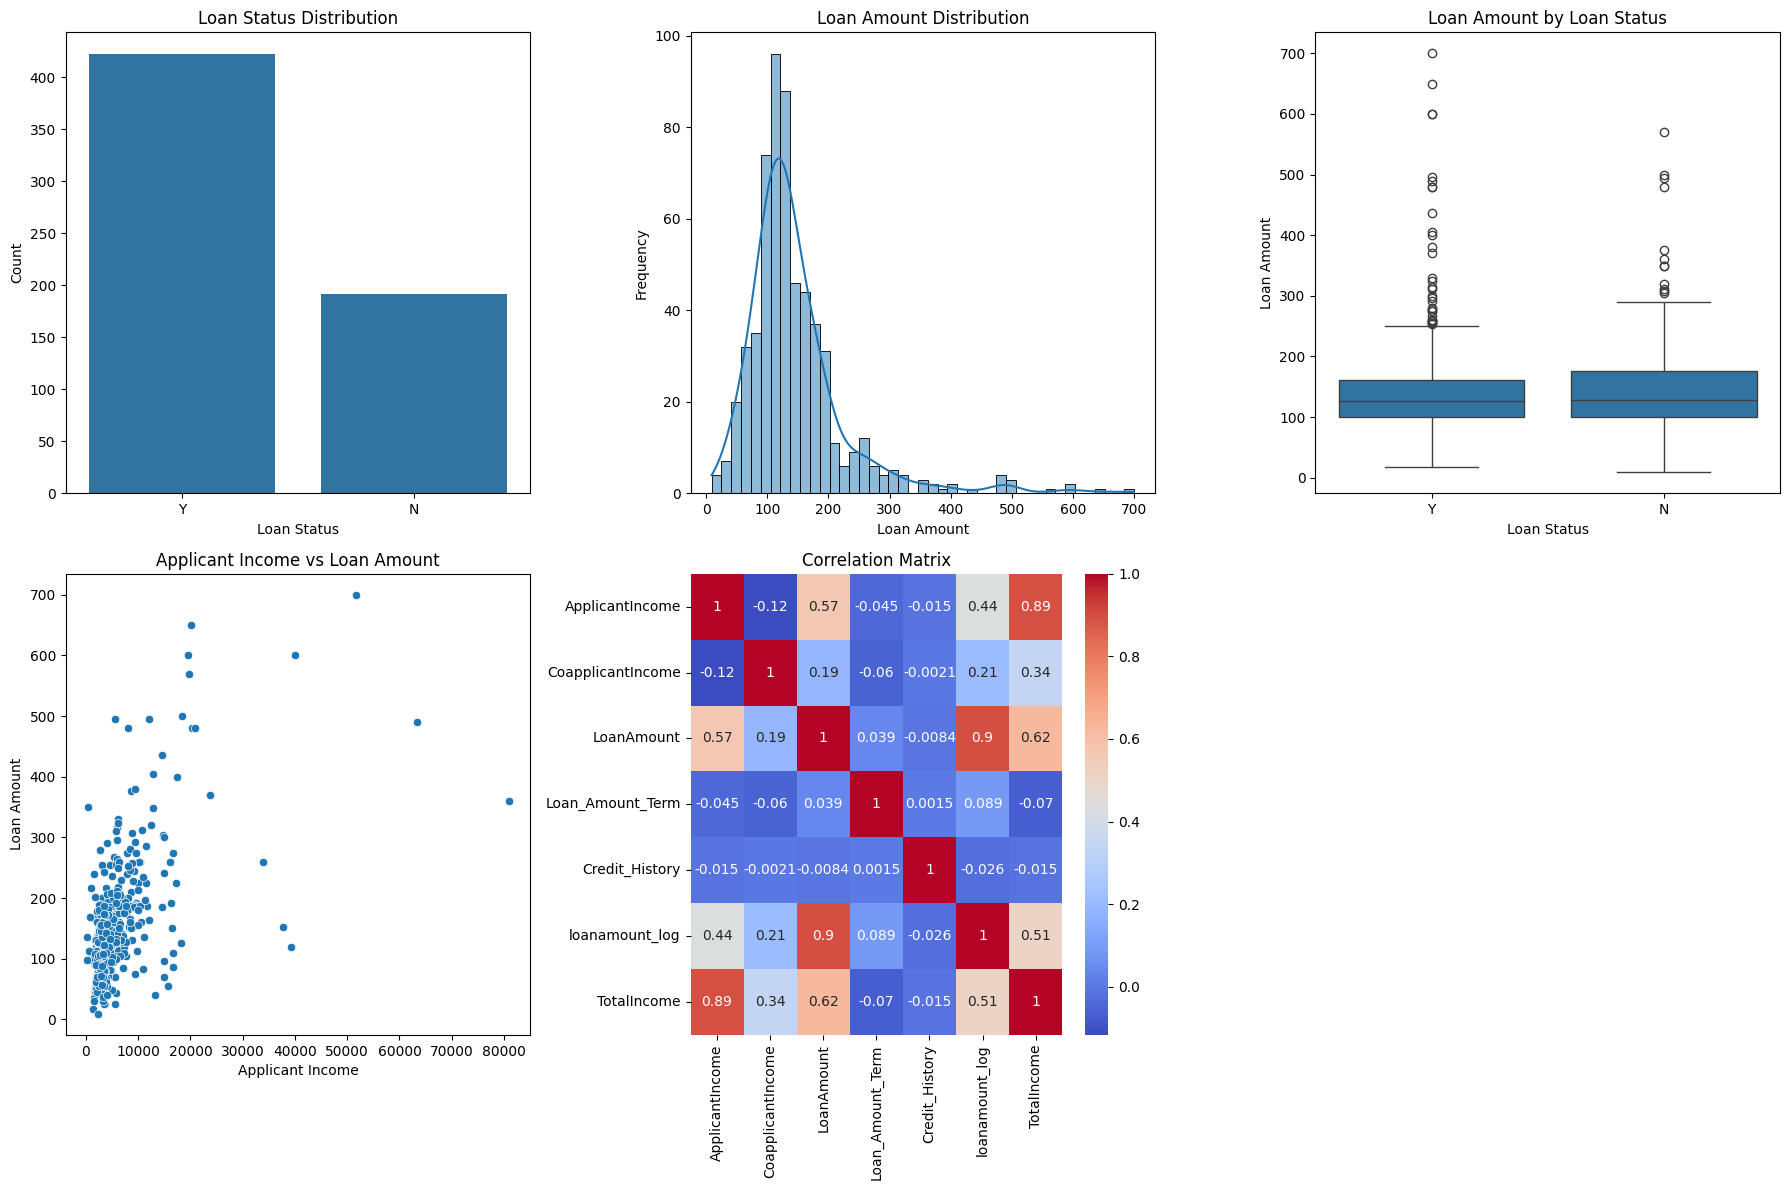

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axis for subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Countplot of Loan Status
sns.countplot(x='Loan_Status', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Loan Status Distribution')
axes[0, 0].set_xlabel('Loan Status')
axes[0, 0].set_ylabel('Count')

# Histogram of Loan Amount
sns.histplot(df['LoanAmount'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Loan Amount Distribution')
axes[0, 1].set_xlabel('Loan Amount')
axes[0, 1].set_ylabel('Frequency')

# Boxplot of Loan Amount by Loan Status
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Loan Amount by Loan Status')
axes[0, 2].set_xlabel('Loan Status')
axes[0, 2].set_ylabel('Loan Amount')

# Scatterplot of Applicant Income vs Loan Amount
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Applicant Income vs Loan Amount')
axes[1, 0].set_xlabel('Applicant Income')
axes[1, 0].set_ylabel('Loan Amount')

# Heatmap of Correlation Matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Correlation Matrix')

# Hide the empty subplot
axes[1, 2].axis('off')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [215]:
# Create a LabelEncoder object to handel missing and NaN values.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        try:
            df[column] = label_encoder.fit_transform(df[column])
        except ValueError as e:
            print(f"Error encoding column '{column}': {e}")


In [216]:
# Fill null values with mode
df.fillna(df.mode().iloc[0], inplace=True)
# Fill null values of loan amount with mean
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [217]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanamount_log       0
TotalIncome          0
dtype: int64

In [218]:
#Performing Random Train Test Split.
from sklearn.model_selection import train_test_split
df_cleaned = df.dropna()
X = df_cleaned.drop(columns=['Loan_Status'])
y = df_cleaned['Loan_Status']

# Perform train-test split on the cleaned data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [219]:
#In this study, i strategically chose Random Forest, Decision Trees, and Support Vector Machine (SVM) models for their diverse methodologies.
# By encompassing these distinct methodologies, we aim to gain a nuanced understanding of how variations in model architecture and training paradigms influence predictive performance.
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
def train_and_evaluate_classifiers(X_train, y_train, X_test, y_test):
    # Initialize classifiers
    classifiers = {
        'Random Forest': RandomForestClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Support Vector Machine': SVC()
    }
    accuracies = {}

    # Train and evaluate each classifier
    for name, classifier in classifiers.items():
        classifier.fit(X_train, y_train)  # Train the classifier
        y_pred = classifier.predict(X_test)  # Make predictions
        accuracy = accuracy_score(y_test, y_pred)  # Evaluate the model
        accuracies[name] = accuracy
        print(f"Accuracy of {name}: {accuracy}")

    return accuracies


In [220]:
accuracies = train_and_evaluate_classifiers(X_train, y_train, X_test, y_test)

Accuracy of Random Forest: 0.7642276422764228
Accuracy of Decision Tree: 0.6747967479674797
Accuracy of Support Vector Machine: 0.6504065040650406


In [221]:
# Kfold validation to split the data

from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
for train_index, test_index in kf.split(df):
  X_train, X_test = df.iloc[train_index], df.iloc[test_index]
  y_train, y_test = df['Loan_Status'][train_index], df['Loan_Status'][test_index]



In [222]:
def train_and_evaluate_classifiers(X_train, y_train, X_test, y_test):
    # Initialize classifiers
    classifiers = {
        'Random Forest': RandomForestClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Support Vector Machine': SVC()
    }
    accuracies = {}

    # Train and evaluate each classifier
    for name, classifier in classifiers.items():
        classifier.fit(X_train, y_train)  # Train the classifier
        y_pred = classifier.predict(X_test)  # Make predictions
        accuracy = accuracy_score(y_test, y_pred)  # Evaluate the model
        accuracies[name] = accuracy
        print(f"Accuracy of {name}: {accuracy}")

    return accuracies

In [223]:
accuracies = train_and_evaluate_classifiers(X_train, y_train, X_test, y_test)

Accuracy of Random Forest: 1.0
Accuracy of Decision Tree: 1.0
Accuracy of Support Vector Machine: 0.6721311475409836


As we can cleary spot the difference in the accuraies of the models, the ones trained on K Fold Validation did way better than the random split.
In summary, our comparison of Random Forest, Decision Trees, and Support Vector Machine (SVM) models highlights distinct performance characteristics. While Random Forests consistently deliver robust results, Decision Trees are sensitive to splitting techniques, showing stability with k-fold cross-validation. Notably, SVMs demonstrate superior generalization with k-fold cross-validation, emphasizing the importance of algorithm selection and splitting strategies for optimal model performance.